<a href="https://colab.research.google.com/github/camilacruz-cs/pretalab-ciclo14-python/blob/main/Aula_11_Estat%C3%ADstica_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Probabilidade, Amostragem e Testes de Hipóteses em Python

> Nesta aula, vamos entender como a estatística descritiva se transforma em **inferência estatística** — ou seja, como podemos **tirar conclusões sobre uma população** com base em **amostras de dados**.


## Objetivos da Aula

Ao final desta aula, você será capaz de:
- Compreender os conceitos básicos de **probabilidade**;
- Aplicar técnicas simples de **amostragem de dados**;
- Entender os princípios dos **testes de hipóteses**;
- Implementar essas análises na prática com **Python (NumPy, Pandas e SciPy)**.


In [ ]:
## Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,4)

## 1. Conceitos Fundamentais de Probabilidade

Para lidar cientificamente com experimentos do cotidiano, necessitamos de formulações matemáticas para ambos (determinísticos e aleatórios). Para isso, modelos teóricos são construídos para cada caso. Por exemplo, a Física clássica lida com problemas em experimentos determinísticos e a Estatística lida com problemas em experimentos aleatórios.


A **probabilidade** é uma forma matematicamente coerente de medir a **chance de um evento ocorrer**.

\[
P(A) = número de casos favoráveis/número total de casos possíveis
\]

**Exemplo simples: Cara ou Coroa**

A probabilidade de cara (ou coroa) é de 50%, pois existem dois resultados possíveis e ambos têm a mesma chance.

In [2]:
p_cara = 1/2
p_1_dado = 1/6

p_par_dado = 3/6

**Exemplo: Lançamento de Dado**

In [4]:
import numpy as np

In [5]:
# Simulando 10.000 lançamentos de um dado
lancamentos = np.random.randint(1, 7, 10000)
lancamentos

# Probabilidade de sair um número par
p_par = np.sum(lancamentos % 2 == 0) / len(lancamentos)
p_par

np.float64(0.5083)

### Criando um modelo probabilístico

Basicamente, a teoria é baseada na construção de um modelo matemático para representar e tratar experimentos aleatórios. Esta construção pode ser sumarizada em dois passos:

1. Para cada experimento aleatório, descreva todo o conjunto de possíveis resultados;

2. “Atribua pesos” a cada possível resultado que reflita a sua chance de ocorrência durante a realização do experimento.


Assim, para descrever o conjunto de possíveis resultados de um experimento, temos a importância da definição do conceito de espaço amostral.

O **Espaço amostral** é um conjunto de (todos) possíveis resultados que podemos ter ao realizar um experimento aleatório.  Ele pode ser finito, infinito enumerável ou, simplesmente, infinito. Cada resultado possível é chamado de ponto ou evento elementar

### Tipos de Eventos

| Tipo                      | Descrição                                 | Exemplo                    |
| ------------------------- | ----------------------------------------- | -------------------------- |
| **Mutuamente exclusivos** | Um evento impede o outro                  | Cara ou coroa              |
| **Independentes**         | Um evento não afeta o outro               | Lançar duas moedas         |
| **Dependentes**           | Um evento altera a probabilidade do outro | Tirar cartas sem reposição |


### Lei da probabilidade composta

P(A∩B)=P(A)×P(B)

In [ ]:
# Probabilidade de sair "cara" em dois lançamentos
p_duas_caras = p_cara*p_cara = 0.5*0.5=0.25

Ca Ca
Ca Co
Co Ca
Co Co

1/4

### Exercícis Práticos - Probabilidade

1. Um dado de 6 faces é lançado uma vez.

* Qual é a probabilidade de sair um número ímpar?

* Qual é a probabilidade de sair um número maior que 4?

* Faça uma simulação em Python com 10.000 lançamentos para verificar se a probabilidade empírica (observada) se aproxima da teórica.

In [26]:
p_teorica_impar = 3/6
print("p_teorica_impar:", p_teorica_impar)

p_teorica_maior4 = 2/6
print("p_teorica_maior4:", p_teorica_maior4)

lancamentos = np.random.randint(1, 7, 9000)

p_emp_impar = np.sum(lancamentos%2!=0)/len(lancamentos)
print("p_emp_impar:", p_emp_impar)

p_emp_maior4 = np.sum(lancamentos>4)/len(lancamentos)
print ("p_emp_maior4:", p_emp_maior4)


p_teorica_impar: 0.5
p_teorica_maior4: 0.3333333333333333
p_emp_impar: 0.49777777777777776
p_emp_maior4: 0.33011111111111113


2. “Qual é a chance de um aluno atingir determinada nota?”
Contexto: Suponha que temos um conjunto de dados com as notas de 1000 estudantes no ENEM (nota geral de 0 a 1000). Queremos saber:

* Qual é a probabilidade de um aluno tirar nota acima de 700?

* E a chance de tirar abaixo de 500?

In [27]:
notas = np.random.uniform(0, 1001, 1000)

In [32]:
notas

array([221.46416823,  48.74007315, 678.01892428, 773.83329009,
        85.04294787, 326.49583429, 315.9550208 , 395.43204691,
       532.26773202, 739.99613948, 613.08657487, 660.73409828,
       595.46043787, 443.56253581, 633.15899627,  41.07933404,
       698.67677278, 943.70528168,  96.27744214,  68.25176619,
       553.3376479 , 881.59454354, 492.86747017, 687.95428518,
       117.28531817, 238.77280369,  40.66694915, 749.34546748,
       284.62838921, 252.22579992,  61.96705356, 437.59000763,
       215.52337864, 635.18189777, 591.41511845, 270.09703452,
       735.83009064, 251.53452714, 612.14123012, 700.50949756,
        67.0647953 , 926.60416314, 487.99422952, 146.66161503,
       810.26032792, 708.99938638,  91.08425556, 845.92390051,
       989.17983778,  24.84086317, 423.98007203, 346.59802872,
       313.30954519,  11.58104182, 653.04173037, 711.50582833,
       648.14976594, 789.78290068, 501.58881639, 611.48752978,
        94.70405593, 724.50602957, 955.25787497, 409.69

In [30]:
acima_700 = np.sum(notas>700)/len(notas)
acima_700

np.float64(0.284)

In [31]:
menor_500 = np.sum(notas<500)/len(notas)
menor_500

np.float64(0.521)

## 2. Distribuições de Probabilidade

Uma distribuição de probabilidade descreve como os valores possíveis de uma variável aleatória se comportam.

👉 Em outras palavras: É o padrão de comportamento que descreve quais valores são mais prováveis e quais são mais raros de ocorrer.

### Tipos principais de distribuição de probabilidade

| Tipo         | Descrição                         | Exemplo                                |
| ------------ | --------------------------------- | -------------------------------------- |
| **Discreta** | Resultados contáveis (finitos)    | Dado, cara ou coroa, número de acertos |
| **Contínua** | Resultados em uma escala contínua | Altura, peso, notas do ENEM            |


### 🔹 Distribuição Uniforme

Todos os valores têm a mesma chance de ocorrer.

Exemplo: probabilidade de um número entre 0 e 10 ser sorteado — todos têm a mesma chance.

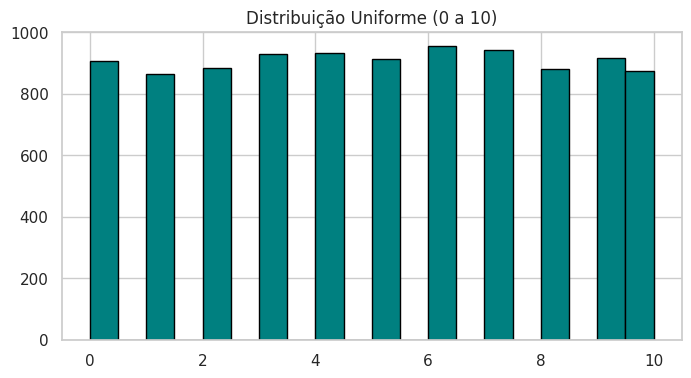

In [ ]:
valores = np.random.randint(0, 11, 10000)

plt.hist(valores, bins=20, color='teal', edgecolor='black')
plt.title('Distribuição Uniforme (0 a 10)')
plt.show()

### 🔹 Distribuição Normal (Gaussiana)

A famosa “curva em forma de sino”, muito comum em fenômenos naturais.

Muitos fenômenos reais seguem essa distribuição — altura, peso, notas, consumo etc.

Características: A média, mediana e moda são iguais, e os dados se concentram em torno do centro.

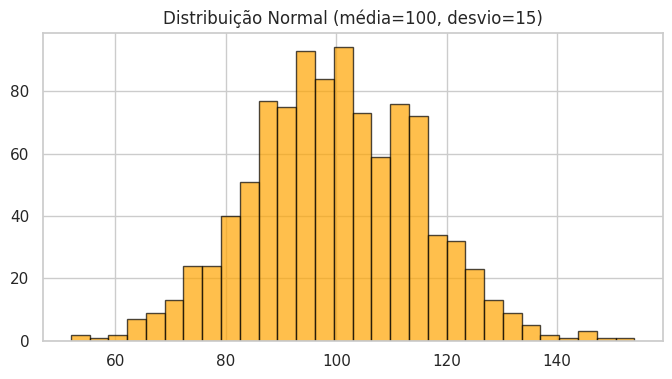

In [ ]:
dados_normais = np.random.normal(100, 15, 1000)
plt.hist(dados_normais, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribuição Normal (média=100, desvio=15)')
plt.show()

Características:

* Média, mediana e moda são iguais;

* 68% dos valores estão a ±1σ da média;

* 95% estão a ±2σ;

* 99,7% estão a ±3σ.

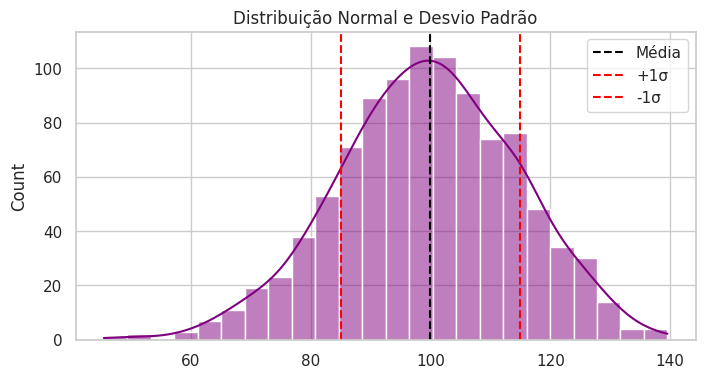

In [ ]:
dados = np.random.normal(100, 15, 1000)
sns.histplot(dados, kde=True, color='purple')
plt.axvline(100, color='black', linestyle='--', label='Média')
plt.axvline(115, color='red', linestyle='--', label='+1σ')
plt.axvline(85, color='red', linestyle='--', label='-1σ')
plt.legend()
plt.title('Distribuição Normal e Desvio Padrão')
plt.show()

### Por que observar a distribuição é importante?

| Motivo                 | O que permite fazer                           | Exemplo ENEM                                   |
| ---------------------- | --------------------------------------------- | ---------------------------------------------- |
| Entender comportamento | Saber se há simetria, dispersão, concentração | Ver que a maioria das notas está entre 500–700 |
| Detectar outliers      | Identificar valores fora do padrão            | Um aluno com 950 pontos                        |
| Escolher testes e modelos       | Aplicar métodos adequados                     | Ver se pode usar teste t                       |
| Comunicar melhor       | Tornar resultados visuais e claros            | Mostrar curva de notas                         |
| Apoiar decisões        | Tomar ações baseadas nos padrões              | Focar apoio em alunos com notas < 500          |


http://leg.ufpr.br/~ara/teach/ebas/handout_08.html

## 3. Amostragem

Nem sempre é possível coletar todos os dados de uma população.
A amostragem é o processo de selecionar uma parte representativa dela.

### “Como estimar o desempenho nacional com poucos dados?”

📘 Contexto:
Se fosse impossível analisar todos os milhões de estudantes que fazem o ENEM. Então usaríamos amostras representativas para estimar a média e a dispersão das notas nacionais.

Interpretação prática:

* Amostras pequenas (ex: 30 alunos) podem flutuar mais.

* Amostras maiores (ex: 500 alunos) se aproximam da média real — Lei dos Grandes Números.

In [ ]:
# Exemplo prático de amostragem

# Simulando uma população de 1000 clientes
populacao = pd.DataFrame({'idade': np.random.normal(35, 10, 1000).astype(int)})

# Amostra aleatória simples de 100 clientes
amostra = populacao.sample(100, random_state=42)

print("Média da população:", populacao['idade'].mean().round(2))
print("Média da amostra:", amostra['idade'].mean().round(2))

Média da população: 34.41
Média da amostra: 34.87


💡 Observe como a média da amostra tende a se aproximar da média da população — é o princípio da Lei dos Grandes Números.

### Visualizando a amostragem

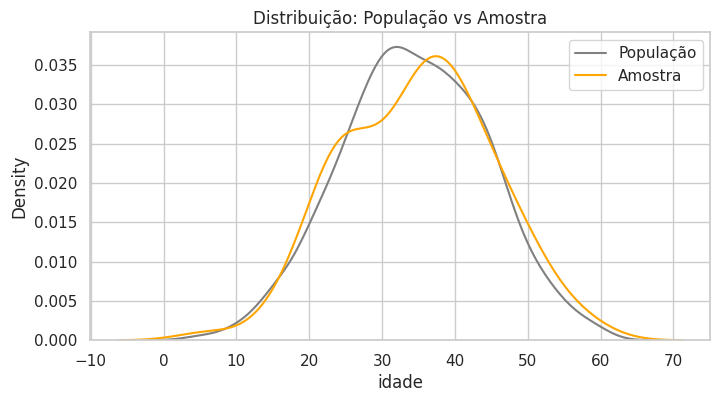

In [ ]:
sns.kdeplot(populacao['idade'], label='População', color='gray')
sns.kdeplot(amostra['idade'], label='Amostra', color='orange')
plt.title('Distribuição: População vs Amostra')
plt.legend()
plt.show()

| Tipo                  | Descrição                                               | Exemplo                                  |
| --------------------- | ------------------------------------------------------- | ---------------------------------------- |
| **Aleatória simples** | Todos têm a mesma chance de serem escolhidos            | `np.random.choice()`                     |
| **Sistemática**       | Seleciona a cada k elementos                            | Cada 10ª pessoa em uma lista             |
| **Estratificada**     | Divide em grupos (estratos) e amostra proporcionalmente | Por gênero, idade, região                |
| **Por conveniência**  | Escolhe os mais acessíveis (menos rigoroso)             | Pesquisar apenas alunos da própria turma |


### Exercício Prático - Amostragem

Criando uma população fictícia de 10.000 estudantes, cujas notas sigam uma distribuição normal com: Média = 600; Desvio padrão = 100

Você é uma pesquisadora do INEP e quer estimar a média das notas de matemática do alunos do ensino fundamental. Analisar todos os estudantes do país é inviável, então você decide trabalhar com amostras.

* Extraia três amostras de tamanhos diferentes (n=30, n=100, n=500).

* Compare as médias.

### Responda e discuta:

* O que acontece com a média da amostra à medida que o tamanho da amostra aumenta?

* As amostras pequenas são mais ou menos parecidas com a população?

* Que riscos existem se a amostra for pequena ou enviesada?

## 4. Introdução à Inferência

A Inferência Estatística tem por objetivo realizar afirmações sobre a população a partir da amostra (Upton and Cook 2014Upton, Graham, and Ian Cook. 2014. A Dictionary of Statistics 3e. Oxford university press.), ou seja, trata-se de um conjunto de procedimentos, baseados na Teoria de Probabilidades, para generalizar características de população a partir da informação contida na amostra.

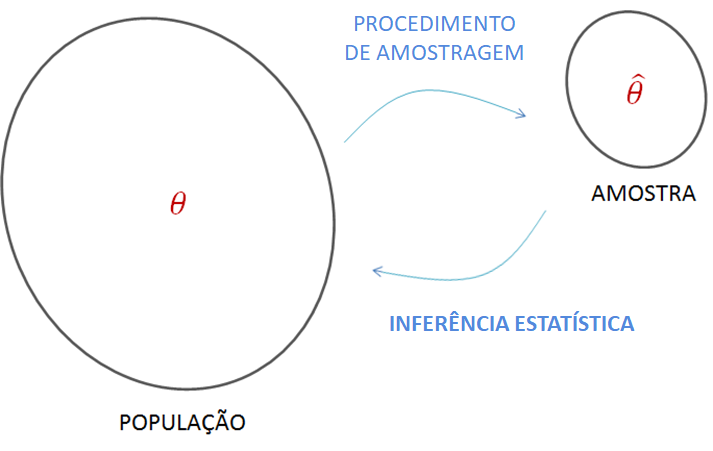

## 5. Testes de Hipóteses

http://leg.ufpr.br/~ara/teach/ebas/handout_10.html

Um teste de hipótese é um experimento mental com os dados.
Ele responde à pergunta:

“O que estou vendo aqui é apenas acaso, ou existe algo real acontecendo?”

🔹 Exemplo intuitivo

Imagine que você coordena um cursinho e quer saber:

“As alunas que participaram do grupo de estudos tiveram notas melhores no ENEM?”

Você tem duas turmas:

* Turma A (controle): não participou dos grupos de estudos

* Turma B (participante): participou

Agora você tem duas médias diferentes:

* Média da Turma A = 610

* Média da Turma B = 640

A diferença é de 30 pontos.
Mas será que isso é real ou poderia ter acontecido por acaso?

Os testes de hipóteses servem para avaliar se a diferença observada é estatisticamente significativa, isto é, se provavelmente não é fruto do acaso.

| Tipo                          | Nome          | Significado               |
| ----------------------------- | ------------- | ------------------------- |
| **H₀ (hipótese nula)**        | “Nada mudou.” | As médias são iguais.     |
| **H₁ (hipótese alternativa)** | “Algo mudou.” | As médias são diferentes. |


---
O termo hipótese remete a formulação provisória, suposição, pressuposição ou ideia. O termo teste remete a exame, verificação, pôr à prova.

Assim, os testes de hipóteses fornecem ferramentas que nos permitem verificar, rejeitar ou não rejeitar, uma hipótese sobre a população através das evidências fornecidas pela amostra.

Através dos métodos estatísticos de teste de hipótese, desejamos verificar se as informações contidas na amostra contrariam ou não afirmações feitas sobre a população.

Desta forma, uma hipótese estatística é uma afirmação sobre as características da distribuição de uma variável aleatória de uma população de interesse, em geral sobre seus parâmetros.

### Etapas de um teste de hipóteses

1. Formular hipóteses

* H₀ (nula)

* H₁ (alternativa)

2. Definir nível de significância (geralmente α = 0.05)

3. Calcular a estatística de teste e o valor-p (p-value)

4. Tomar decisão

* Se p < α → rejeita H₀

* Se p ≥ α → não rejeita H₀

* “Há diferença significativa entre escolas públicas e particulares?”

Queremos responder a pergunta: “Os alunos de escolas particulares têm desempenho médio maior que os de escolas públicas no ENEM?”

## Referências

* http://www.leg.ufpr.br/~paulojus/estbas/
* http://leg.ufpr.br/~ara/teach/ebas/handout_06.html